In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import pandas as pd
from plotnine import *

In [5]:
shop = pd.read_csv("C:/Users/joyh1/Desktop/DSC/Inflearn강의자료/데이터분석/data/소상공인시장진흥공단_상가업소정보_201806_01.csv", encoding="cp949", engine="python")

In [6]:
shop.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196


In [12]:
shop.shape

(476183, 39)

In [15]:
columns = ['상호명','지점명','상권업종대분류명','상권업종중분류명','상권업종소분류명',
          '시도명','시군구명','행정동명','법정동명','지번주소','도로명','경도','위도']
shop = shop[columns]
shop.head(2)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,도로명,경도,위도
0,엘가커피부산아시아드점,부산아시아드점,음식,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,거제2동,거제동,부산광역시 연제구 거제동 1208,부산광역시 연제구 종합운동장로,129.062034,35.191284
1,비비안아울렛중계점,아울렛중계점,소매,의복의류,셔츠/내의/속옷,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 중계동 509,서울특별시 노원구 동일로204가길,127.067888,37.641280


In [17]:
shop.isnull().sum()

상호명              1
지점명         416061
상권업종대분류명         0
상권업종중분류명         0
상권업종소분류명         0
시도명              0
시군구명             0
행정동명             0
법정동명             0
지번주소             0
도로명              0
경도               0
위도               0
dtype: int64

In [18]:
# 지점명은 상호명에 종속되니 지점명 칼럼은 없애도 무방
shop = shop.drop(['지점명'], axis=1)
shop.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,도로명,경도,위도
0,엘가커피부산아시아드점,음식,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,거제2동,거제동,부산광역시 연제구 거제동 1208,부산광역시 연제구 종합운동장로,129.062034,35.191284
1,비비안아울렛중계점,소매,의복의류,셔츠/내의/속옷,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 중계동 509,서울특별시 노원구 동일로204가길,127.067888,37.641280


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# window 폰트설정
plt.rc("font", family="Malgun Gothic")

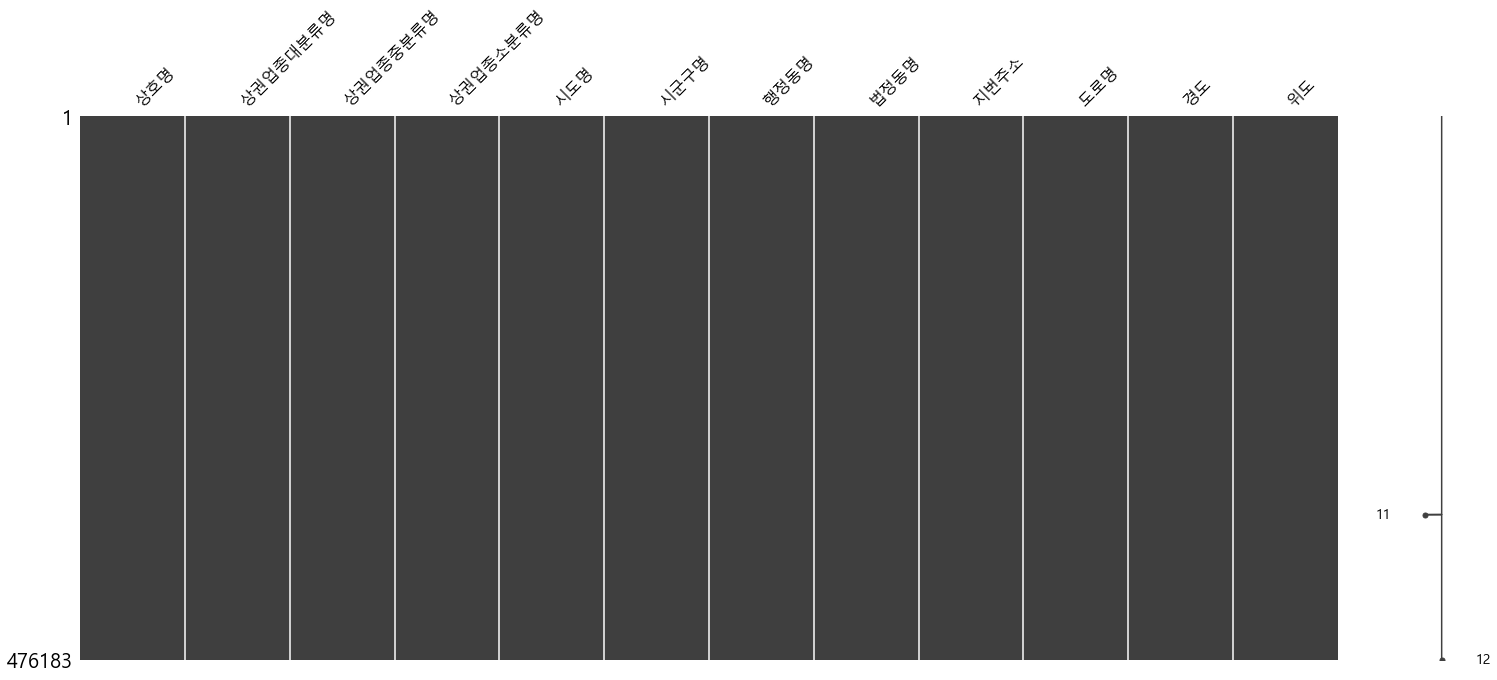

In [22]:
# missingno 라이브러리로 결측치 값에 대한 시각화 표현 가능
import missingno as msno
msno.matrix(shop)

# 검은색 부분이 모두 데이터가 있는 것임. 결국 모든 칼럼에 대한 결측치는 없음!

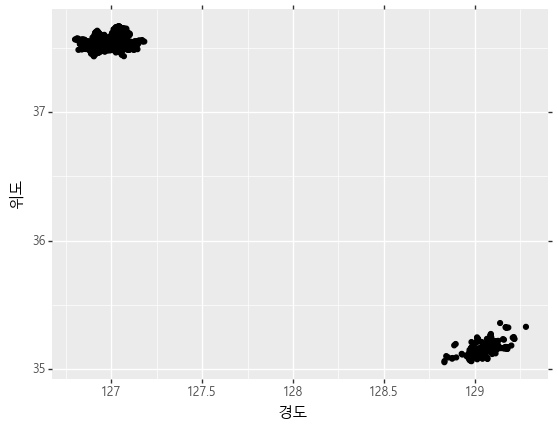

<ggplot: (173781292769)>

In [24]:
(ggplot(shop[:1000])
 +aes(x='경도', y='위도')
 +geom_point()
 +theme(text=element_text(family="Malgun Gothic"))
)

# 1000개의 데이터를 일부 추출하긴 했지만 위도와 경도 그래프를 보면 두개의 지역에 몰려있음을 알 수 있다..

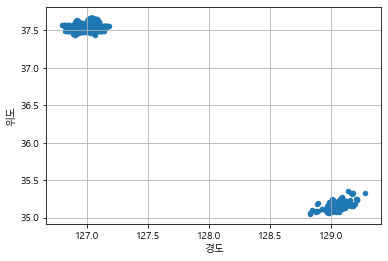

In [25]:
# 위도와 경도를 plot.scatter을 이용해 산점도를 그려본다
shop[:1000].plot.scatter(x='경도', y='위도' , grid=True)

In [26]:
shop.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,도로명,경도,위도
0,엘가커피부산아시아드점,음식,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,거제2동,거제동,부산광역시 연제구 거제동 1208,부산광역시 연제구 종합운동장로,129.062034,35.191284
1,비비안아울렛중계점,소매,의복의류,셔츠/내의/속옷,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 중계동 509,서울특별시 노원구 동일로204가길,127.067888,37.641280


In [27]:
# 지번주소와 도로명의 차이는 구, 신 주소차이기 때문에 둘 중 하나를 삭제한다. 도로명 칼럼을 삭제하겠다.
shop = shop.drop(['도로명'], axis=1)
shop.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도
0,엘가커피부산아시아드점,음식,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,거제2동,거제동,부산광역시 연제구 거제동 1208,129.062034,35.191284
1,비비안아울렛중계점,소매,의복의류,셔츠/내의/속옷,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 중계동 509,127.067888,37.641280


In [34]:
# 데이터가 서울과 부산으로만 나누어져 있다. 
# 그렇다면 주소가 서울인 데이터와 부산 데이터로 나누어보자.
# 나눌때 지번주소가 '서울', '부산' 으로 시작하는 문자열을 기준으로 해서 데이터를 두 종류로 나눠보자

shop_seoul = shop.loc[shop['지번주소'].str.startswith('서울')]
shop_seoul['지번주소'].value_counts

<bound method IndexOpsMixin.value_counts of 1             서울특별시 노원구 중계동 509
2             서울특별시 종로구 창신동 297
3         서울특별시 은평구 불광동 281-108
4          서울특별시 강남구 신사동 517-27
8            서울특별시 성북구 길음동 1276
                  ...          
476175      서울특별시 종로구 낙원동 132-6
476176     서울특별시 마포구 서교동 334-17
476178     서울특별시 강동구 천호동 454-57
476179      서울특별시 은평구 응암동 98-65
476182        서울특별시 성동구 옥수동 428
Name: 지번주소, Length: 330089, dtype: object>

In [35]:
shop_busan = shop.loc[shop['지번주소'].str.startswith('부산')]
shop_busan['지번주소'].value_counts

<bound method IndexOpsMixin.value_counts of 0            부산광역시 연제구 거제동 1208
5          부산광역시 연제구 거제동 1476-7
6         부산광역시 부산진구 양정동 350-61
7            부산광역시 부산진구 부암동 257
11             부산광역시 남구 문현동 751
                  ...          
476164    부산광역시 부산진구 부전동 504-30
476165      부산광역시 해운대구 재송동 1210
476177     부산광역시 부산진구 전포동 658-1
476180     부산광역시 부산진구 당감동 768-3
476181      부산광역시 동래구 명장동 61-23
Name: 지번주소, Length: 146094, dtype: object>

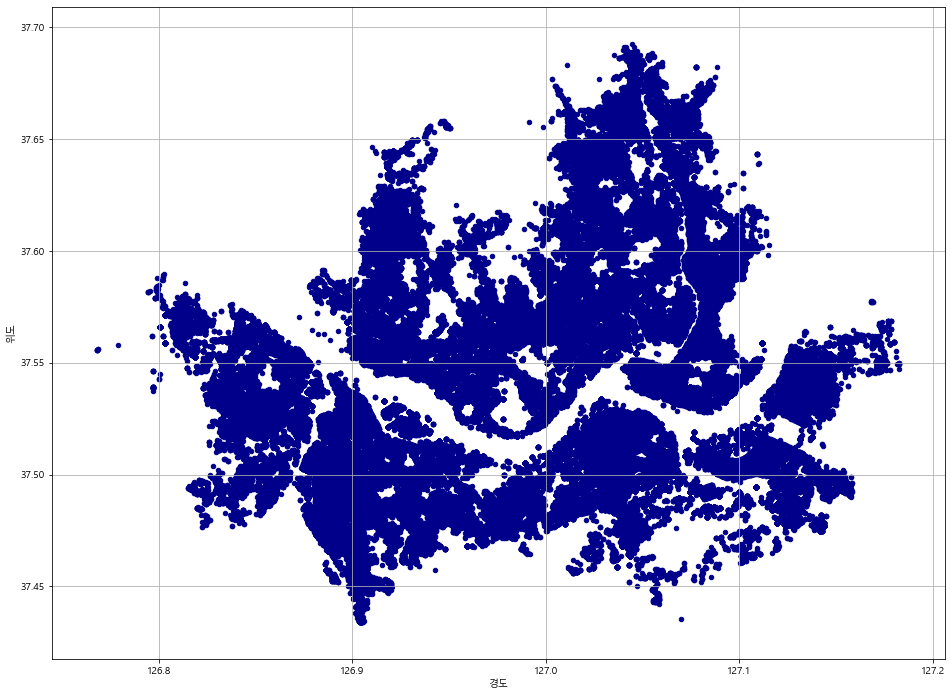

In [39]:
# 서울 지역의 데이터를 이용해서 상권 분포도를 위도와 경도 칼럼을 이용해서 그려보자
shop_seoul.plot.scatter(x='경도', y='위도', c='Darkblue', figsize=(16,12), grid=True)

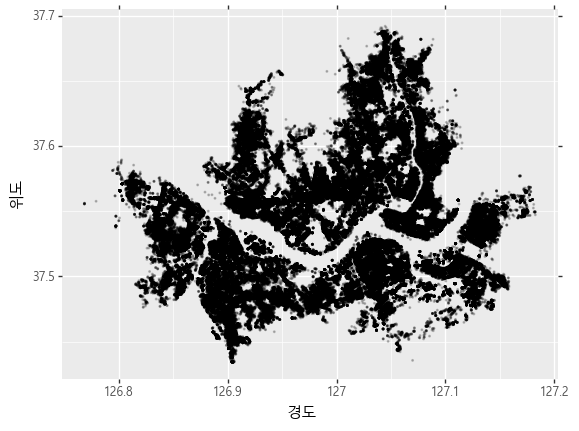

<ggplot: (-9223371863073467497)>

In [41]:
# ggplot을 이용해서 서울 지역 데이터 상권 분포도를 나타내보자
(ggplot(shop_seoul)
 +aes(x='경도', y='위도')
 +geom_point(color='black', alpha=0.2, size=0.2)
 +theme(text=element_text(family='Malgun Gothic'))
)

In [44]:
shop['지번주소'].head(5)

0       부산광역시 연제구 거제동 1208
1        서울특별시 노원구 중계동 509
2        서울특별시 종로구 창신동 297
3    서울특별시 은평구 불광동 281-108
4     서울특별시 강남구 신사동 517-27
Name: 지번주소, dtype: object

In [47]:
# 이제 군구별로 표시하기 위해서 서울,부산이 합쳐진 데이터에서 시도, 군구 칼럼을 따로 만든다.

shop['시도'] = shop['지번주소'].str.split(" ", expand=True)[0]
shop['군구'] = shop['지번주소'].str.split(" ", expand=True)[1]
shop.head(5)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도,시도,군구
0,엘가커피부산아시아드점,음식,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,거제2동,거제동,부산광역시 연제구 거제동 1208,129.062034,35.191284,부산광역시,연제구
1,비비안아울렛중계점,소매,의복의류,셔츠/내의/속옷,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 중계동 509,127.067888,37.641280,서울특별시,노원구
2,연세정신건강의학과의원,의료,병원,기타병원,서울특별시,종로구,창신1동,창신동,서울특별시 종로구 창신동 297,127.014500,37.573196,서울특별시,종로구
3,독일지멘스보청기은평점,소매,의약/의료품소매,보청기판매,서울특별시,은평구,불광1동,불광동,서울특별시 은평구 불광동 281-108,126.929871,37.610888,서울특별시,은평구
4,서울모드,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,신사동,서울특별시 강남구 신사동 517-27,127.022212,37.519315,서울특별시,강남구


In [49]:
# 다시 서울, 부산 데이터로 각각 나누자.
shop_seoul = shop.loc[shop['지번주소'].str.startswith('서울')]
shop_busan = shop.loc[shop['지번주소'].str.startswith('부산')]

In [51]:
print(shop_seoul['지번주소'].value_counts)
print()
print(shop_busan['지번주소'].value_counts)

<bound method IndexOpsMixin.value_counts of 1             서울특별시 노원구 중계동 509
2             서울특별시 종로구 창신동 297
3         서울특별시 은평구 불광동 281-108
4          서울특별시 강남구 신사동 517-27
8            서울특별시 성북구 길음동 1276
                  ...          
476175      서울특별시 종로구 낙원동 132-6
476176     서울특별시 마포구 서교동 334-17
476178     서울특별시 강동구 천호동 454-57
476179      서울특별시 은평구 응암동 98-65
476182        서울특별시 성동구 옥수동 428
Name: 지번주소, Length: 330089, dtype: object>

<bound method IndexOpsMixin.value_counts of 0            부산광역시 연제구 거제동 1208
5          부산광역시 연제구 거제동 1476-7
6         부산광역시 부산진구 양정동 350-61
7            부산광역시 부산진구 부암동 257
11             부산광역시 남구 문현동 751
                  ...          
476164    부산광역시 부산진구 부전동 504-30
476165      부산광역시 해운대구 재송동 1210
476177     부산광역시 부산진구 전포동 658-1
476180     부산광역시 부산진구 당감동 768-3
476181      부산광역시 동래구 명장동 61-23
Name: 지번주소, Length: 146094, dtype: object>


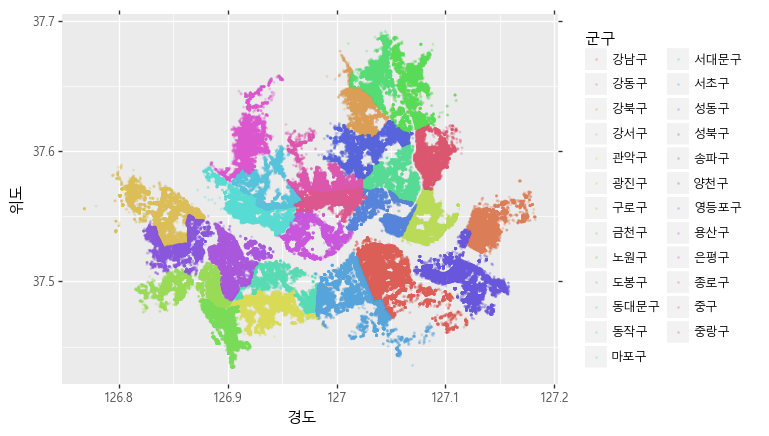

<ggplot: (173726915746)>

In [53]:
# 서울시 데이터를 구군별로 얼마나 분포되는지 살펴보자.
(ggplot(shop_seoul)
 +aes(x='경도', y='위도', color='군구')
 +geom_point(alpha=0.2, size=0.2)
 +theme(text=element_text(family="Malgun Gothic"))
)

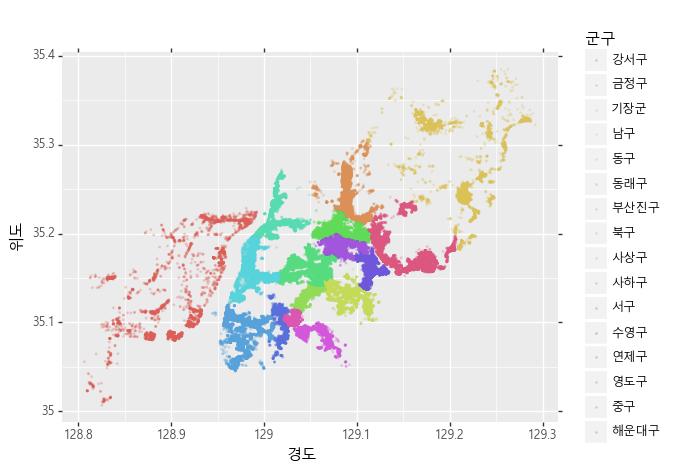

<ggplot: (-9223371863057044662)>

In [54]:
# 부산시 데이터를 구군별로 얼마나 분포되는지 살펴보자.
(ggplot(shop_busan)
 +aes(x='경도',y='위도', color='군구')
 +geom_point(alpha=0.2, size=0.2)
 +theme(text=element_text(family="Malgun Gothic"))
)

In [55]:
shop_seoul.head(3)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도,시도,군구
1,비비안아울렛중계점,소매,의복의류,셔츠/내의/속옷,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 중계동 509,127.067888,37.641280,서울특별시,노원구
2,연세정신건강의학과의원,의료,병원,기타병원,서울특별시,종로구,창신1동,창신동,서울특별시 종로구 창신동 297,127.014500,37.573196,서울특별시,종로구
3,독일지멘스보청기은평점,소매,의약/의료품소매,보청기판매,서울특별시,은평구,불광1동,불광동,서울특별시 은평구 불광동 281-108,126.929871,37.610888,서울특별시,은평구


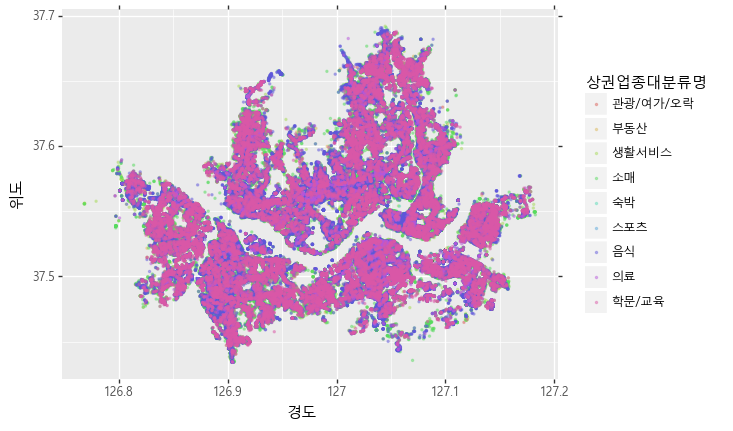

<ggplot: (-9223371863165574000)>

In [56]:
# 이번엔 서울데이터 중 '상권업종대분류명'에 따라서 분포도를 살펴보자
(ggplot(shop_seoul)
 +aes(x='경도', y='위도', color='상권업종대분류명')
 +geom_point(alpha=0.4, size=0.4)
 +theme(text=element_text(family="Malgun Gothic"))
)

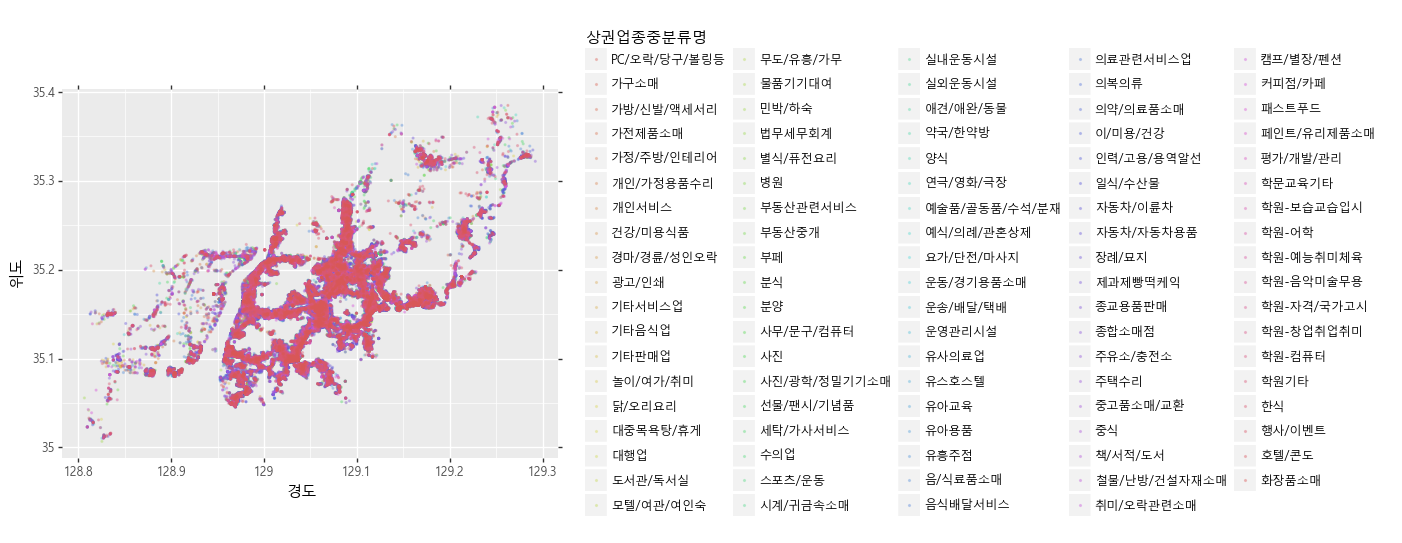

<ggplot: (173796797083)>

In [57]:
# 이번엔 부산데이터 중 '상권업종중분류명'에 따라서 분포도를 살펴보자
(ggplot(shop_busan)
 +aes(x='경도', y='위도', color='상권업종중분류명')
 +geom_point(alpha=0.3, size=0.3)
 +theme(text=element_text(family="Malgun Gothic"))
)

In [58]:
# 상권업종중분류명 중 '병원'에 대한 데이터만 산포도로 그려보자
shop_busan_hospital = shop_busan.loc[shop_busan['상권업종중분류명'] == "병원"]
shop_busan_hospital.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도,시도,군구
159,다사랑요양병원,의료,병원,노인/치매병원,부산광역시,북구,만덕2동,만덕동,부산광역시 북구 만덕동 136-2,129.040773,35.209154,부산광역시,북구
245,김한규치과의원,의료,병원,치과의원,부산광역시,중구,중앙동,중앙동4가,부산광역시 중구 중앙동4가 84-2,129.037517,35.107595,부산광역시,중구


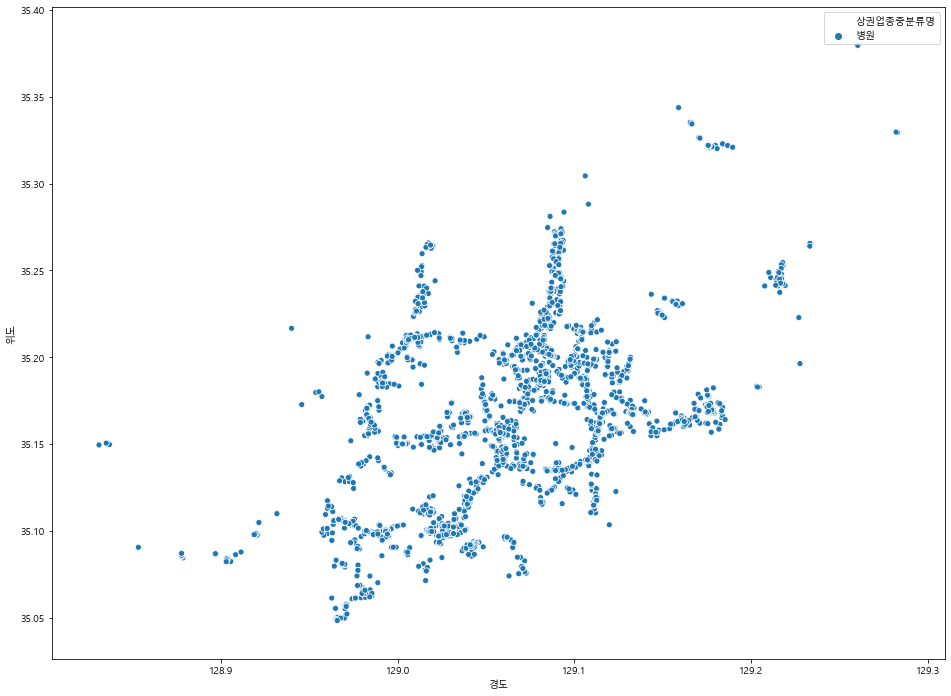

In [61]:
# 이번엔 sns.plot.scatter를 이용해서 살펴보자
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_busan_hospital, x='경도', y='위도', hue='상권업종중분류명', alpha='auto')

In [63]:
shop_busan_hospital.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도,시도,군구
159,다사랑요양병원,의료,병원,노인/치매병원,부산광역시,북구,만덕2동,만덕동,부산광역시 북구 만덕동 136-2,129.040773,35.209154,부산광역시,북구
245,김한규치과의원,의료,병원,치과의원,부산광역시,중구,중앙동,중앙동4가,부산광역시 중구 중앙동4가 84-2,129.037517,35.107595,부산광역시,중구
250,부산혜민요양병원,의료,병원,종합병원,부산광역시,동구,범일1동,범일동,부산광역시 동구 범일동 62-744,129.056956,35.140030,부산광역시,동구
282,동의대학교한방병원,의료,병원,한방병원,부산광역시,부산진구,양정2동,양정동,부산광역시 부산진구 양정동 산45-1,129.076761,35.169061,부산광역시,부산진구
296,최시열한의원,의료,병원,한의원,부산광역시,부산진구,범천1동,범천동,부산광역시 부산진구 범천동 870-21,129.058533,35.147417,부산광역시,부산진구


In [7]:
# 위에서 구했던 부산시 병원 업종의 데이터만을 갖고 folium 라이브러리를 이용해서 실제 지도에 표시해보자.

import folium

# 경도,위도를 중심으로 맞추고 지도에 표시해주는 함수를 만들자
def map_express(data):
    map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()],
                    zoom_start = 12, tiles='Stamen Terrain')
    for i in data.index:
        shop_name = data.loc[i, '상호명']+"-"+data.loc[i, '지번주소']
        folium.Marker([data.loc[i, '위도'],
                       data.loc[i, '경도']],
                     popup=shop_name).add_to(map)
    return map
    

In [72]:
# 모두 표시하면 컴퓨터가 느려져서 100개만 표시

map_express(shop_busan_hospital[:100])

In [70]:
shop.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280


In [71]:
shop_seoul = shop[shop['도로명주소'].str.startswith('서울')]
shop_seoul.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315
8,11720327,국대떡볶이길음역점,길음역점,Q,음식,Q04,분식,Q04A03,떡볶이전문,I56194,...,1129013400112760000026337,삼부아파트,서울특별시 성북구 동소문로 248,136757,2735.0,NaN,2,NaN,127.024543,37.603455


In [72]:
shop_seoul.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [73]:
columns = ['시도명','상호명','상권업종소분류명','도로명주소', '위도','경도']
shop_seoul = shop_seoul[columns]
shop_seoul.head(2)

,시도명,상호명,상권업종소분류명,도로명주소,위도,경도
1,서울특별시,비비안아울렛중계점,셔츠/내의/속옷,서울특별시 노원구 동일로204가길 46,37.641280,127.067888
2,서울특별시,연세정신건강의학과의원,기타병원,서울특별시 종로구 종로 335-3,37.573196,127.014500


In [74]:
shop_seoul['상권업종소분류명'].value_counts()

한식/백반/한정식      23721
여성미용실          15190
커피전문점/카페/다방    14662
부동산중개          12245
일반의류            9451
               ...  
학원-섬유기술            1
수입담배판매             1
등세공품판매             1
볼링용품판매             1
가구판매-등가구           1
Name: 상권업종소분류명, Length: 686, dtype: int64

In [75]:
shop_seoul = shop_seoul.loc[shop_seoul['상권업종소분류명'] == '일반의류']
shop_seoul.head(2)

,시도명,상호명,상권업종소분류명,도로명주소,위도,경도
523,서울특별시,지코스모,일반의류,서울특별시 영등포구 경인로 846,37.515661,126.907647
670,서울특별시,디오니,일반의류,서울특별시 도봉구 덕릉로63길 106,37.646047,127.039896


In [76]:
shop_seoul['상호명'].value_counts()

올리브         22
루디아         19
웰메이드        15
업소명없음       15
옷가게         14
            ..
폴앤앨리스        1
장지동옷집        1
아파치큰옷전문점     1
펑키           1
르레브          1
Name: 상호명, Length: 7783, dtype: int64

In [77]:
shop_seoul['브랜드명'] = ''
shop_seoul.head(2)

,시도명,상호명,상권업종소분류명,도로명주소,위도,경도,브랜드명
523,서울특별시,지코스모,일반의류,서울특별시 영등포구 경인로 846,37.515661,126.907647,
670,서울특별시,디오니,일반의류,서울특별시 도봉구 덕릉로63길 106,37.646047,127.039896,


In [78]:
seoul_clothes = shop_seoul[shop_seoul['상호명'].str.contains('올리브|루디아')]
seoul_clothes.head()

,시도명,상호명,상권업종소분류명,도로명주소,위도,경도,브랜드명
19961,서울특별시,올리브홍은3동,일반의류,서울특별시 서대문구 가좌로 142-12,37.585084,126.924081,
25931,서울특별시,올리브,일반의류,서울특별시 마포구 도화길 28,37.539595,126.949607,
26915,서울특별시,올리브,일반의류,서울특별시 강동구 고덕로 210,37.553801,127.147049,
26960,서울특별시,루디아,일반의류,서울특별시 노원구 중계로 184,37.651103,127.079585,
46386,서울특별시,루디아,일반의류,서울특별시 송파구 백제고분로18길 27,37.502727,127.084169,


In [79]:
# 일반의류가게 올리브와 루디아 각각 분포도 알아보기

seoul_clothes.loc[seoul_clothes['상호명'].str.contains('올리브'), '브랜드명'] = '올리브'
seoul_clothes.loc[seoul_clothes['상호명'].str.contains('루디아'), '브랜드명'] = '루디아'

In [80]:
seoul_clothes[['상호명','브랜드명']]

,상호명,브랜드명
19961,올리브홍은3동,올리브
25931,올리브,올리브
26915,올리브,올리브
26960,루디아,루디아
46386,루디아,루디아
50771,루디아,루디아
71267,루디아,루디아
83707,루디아,루디아
144823,루디아,루디아
151710,루디아,루디아


In [81]:
seoul_clothes.head(2)

,시도명,상호명,상권업종소분류명,도로명주소,위도,경도,브랜드명
19961,서울특별시,올리브홍은3동,일반의류,서울특별시 서대문구 가좌로 142-12,37.585084,126.924081,올리브
25931,서울특별시,올리브,일반의류,서울특별시 마포구 도화길 28,37.539595,126.949607,올리브


In [82]:
                                                                    # expand=True 옵션줘야 에러안남!
seoul_clothes['시군구'] = seoul_clothes['도로명주소'].str.split(" ", expand=True)[1]
seoul_clothes.head()

,시도명,상호명,상권업종소분류명,도로명주소,위도,경도,브랜드명,시군구
19961,서울특별시,올리브홍은3동,일반의류,서울특별시 서대문구 가좌로 142-12,37.585084,126.924081,올리브,서대문구
25931,서울특별시,올리브,일반의류,서울특별시 마포구 도화길 28,37.539595,126.949607,올리브,마포구
26915,서울특별시,올리브,일반의류,서울특별시 강동구 고덕로 210,37.553801,127.147049,올리브,강동구
26960,서울특별시,루디아,일반의류,서울특별시 노원구 중계로 184,37.651103,127.079585,루디아,노원구
46386,서울특별시,루디아,일반의류,서울특별시 송파구 백제고분로18길 27,37.502727,127.084169,루디아,송파구


In [83]:
df_clothes = pd.DataFrame(seoul_clothes.groupby(['시군구', '브랜드명'])['상호명'].count()).reset_index()
df_clothes.columns = ['구','브랜드명','매장수']
df_clothes

,구,브랜드명,매장수
0,강남구,루디아,1
1,강남구,올리브,1
2,강동구,루디아,6
3,강동구,올리브,2
4,강북구,올리브,1
5,관악구,올리브,2
6,구로구,올리브,1
7,노원구,루디아,2
8,도봉구,올리브,1
9,동작구,올리브,1


In [84]:
import matplotlib.pyplot as plt

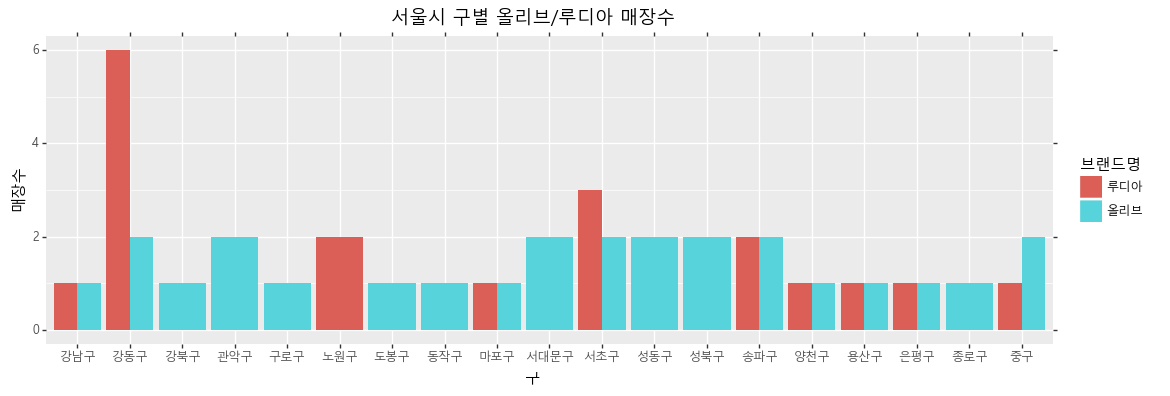

<ggplot: (173498984768)>

In [85]:
(ggplot(df_clothes)
 +aes(x='구', y='매장수', fill='브랜드명')
 +geom_bar(stat='identity', position='dodge')
 +ggtitle('서울시 구별 올리브/루디아 매장수')
 +theme(text=element_text(family="Malgun Gothic"), figure_size=(13,4))
)

In [87]:
seoul_clothes.head()

,시도명,상호명,상권업종소분류명,도로명주소,위도,경도,브랜드명,시군구
19961,서울특별시,올리브홍은3동,일반의류,서울특별시 서대문구 가좌로 142-12,37.585084,126.924081,올리브,서대문구
25931,서울특별시,올리브,일반의류,서울특별시 마포구 도화길 28,37.539595,126.949607,올리브,마포구
26915,서울특별시,올리브,일반의류,서울특별시 강동구 고덕로 210,37.553801,127.147049,올리브,강동구
26960,서울특별시,루디아,일반의류,서울특별시 노원구 중계로 184,37.651103,127.079585,루디아,노원구
46386,서울특별시,루디아,일반의류,서울특별시 송파구 백제고분로18길 27,37.502727,127.084169,루디아,송파구


In [92]:
df_clothes.head()

,구,브랜드명,매장수
0,강남구,루디아,1
1,강남구,올리브,1
2,강동구,루디아,6
3,강동구,올리브,2
4,강북구,올리브,1


In [93]:
seoul_gu = pd.DataFrame(df_clothes.groupby(['구'])['매장수'].count())
seoul_gu

,매장수
구,
강남구,2
강동구,2
강북구,1
관악구,1
구로구,1
노원구,1
도봉구,1
동작구,1
마포구,2


In [94]:
seoul_gu.head(2)

,매장수
구,
강남구,2
강동구,2


In [101]:
seoul_clothes

,시도명,상호명,상권업종소분류명,도로명주소,위도,경도,브랜드명,시군구
19961,서울특별시,올리브홍은3동,일반의류,서울특별시 서대문구 가좌로 142-12,37.585084,126.924081,올리브,서대문구
25931,서울특별시,올리브,일반의류,서울특별시 마포구 도화길 28,37.539595,126.949607,올리브,마포구
26915,서울특별시,올리브,일반의류,서울특별시 강동구 고덕로 210,37.553801,127.147049,올리브,강동구
26960,서울특별시,루디아,일반의류,서울특별시 노원구 중계로 184,37.651103,127.079585,루디아,노원구
46386,서울특별시,루디아,일반의류,서울특별시 송파구 백제고분로18길 27,37.502727,127.084169,루디아,송파구
50771,서울특별시,루디아,일반의류,서울특별시 은평구 은평로 202,37.601088,126.930147,루디아,은평구
71267,서울특별시,루디아,일반의류,서울특별시 강동구 고덕로79길 18,37.557315,127.168502,루디아,강동구
83707,서울특별시,루디아,일반의류,서울특별시 강동구 천호대로197길 22,37.536913,127.146743,루디아,강동구
144823,서울특별시,루디아,일반의류,서울특별시 용산구 이촌로 352,37.517371,126.985156,루디아,용산구
151710,서울특별시,루디아,일반의류,서울특별시 강동구 진황도로27길 14,37.538976,127.131862,루디아,강동구


In [86]:
import json

geo_path = "C:/Users/joyh1/Desktop/DSC/Inflearn강의자료/데이터분석/data/seoul-maps-master/kostat/2013/json/seoul_municipalities_geo_simple.json"
geo_json = json.load(open(geo_path, encoding='utf-8'))

In [103]:
map = folium.Map(location=[seoul_clothes['위도'].mean(), seoul_clothes['경도'].mean()], zoom_start=11)

map.choropleth(geo_data=geo_json,
              data=seoul_gu['매장수'],
              columns=[seoul_clothes.index, seoul_gu['매장수']],
              fill_color='Purples',
              fill_opacity=0.2,
              line_opacity=0.2,
              highlight=True,
              key_on = 'feature.properties.name')

for n in seoul_clothes.index:
    popup_name = seoul_clothes.loc[n, '상호명']+"-"+seoul_clothes.loc[n, '도로명주소']
    if seoul_clothes.loc[n, '브랜드명'] == "루디아":
        icon_color = "red"
    else:
        icon_color = "blue"
        
    folium.CircleMarker(
    location=[seoul_clothes.loc[n, '위도'], seoul_clothes.loc[n, '경도']],
    radius=3,
    popup=popup_name,
    color=icon_color,
    fill=True,
    fill_color=icon_color).add_to(map)

# popup encoding 깨짐 해결 위해 html 파일로 저장
# map.save_to("index.html")

map

In [104]:
seoul_clothes.head(2)

,시도명,상호명,상권업종소분류명,도로명주소,위도,경도,브랜드명,시군구
19961,서울특별시,올리브홍은3동,일반의류,서울특별시 서대문구 가좌로 142-12,37.585084,126.924081,올리브,서대문구
25931,서울특별시,올리브,일반의류,서울특별시 마포구 도화길 28,37.539595,126.949607,올리브,마포구


In [115]:
df_temp = seoul_clothes[seoul_clothes['브랜드명'] == "올리브"]
df_olive = pd.DataFrame(df_temp.groupby(['시군구'])['상호명'].count())
df_olive.columns=['매장수']
df_olive.head(2)

,매장수
시군구,
강남구,1
강동구,2


In [ ]:
# 올리브 매장 분포 folium 해보기

In [ ]:
# 루디아 매장 분포 folium 해보기

In [121]:
df_clothes.head()

,구,브랜드명,매장수
0,강남구,루디아,1
1,강남구,올리브,1
2,강동구,루디아,6
3,강동구,올리브,2
4,강북구,올리브,1


In [124]:
df_clothes_vs = df_clothes.pivot_table(index='구', columns='브랜드명', values='매장수')
df_clothes_vs['루디아'] = df_clothes_vs['루디아'].fillna(0)
df_clothes_vs['올리브'] = df_clothes_vs['올리브'].fillna(0)
df_clothes_vs

브랜드명,루디아,올리브
구,,
강남구,1.0,1.0
강동구,6.0,2.0
강북구,0.0,1.0
관악구,0.0,2.0
구로구,0.0,1.0
노원구,2.0,0.0
도봉구,0.0,1.0
동작구,0.0,1.0
마포구,1.0,1.0


In [125]:
df_clothes_vs['매장수비교'] = df_clothes_vs.apply(lambda x : 1 if x['올리브'] >= x['루디아'] else 0, axis=1)

In [126]:
df_clothes_vs.head()

브랜드명,루디아,올리브,매장수비교
구,,,
강남구,1.0,1.0,1
강동구,6.0,2.0,0
강북구,0.0,1.0,1
관악구,0.0,2.0,1
구로구,0.0,1.0,1


In [129]:
seoul_clothes.head(2)

,시도명,상호명,상권업종소분류명,도로명주소,위도,경도,브랜드명,시군구
19961,서울특별시,올리브홍은3동,일반의류,서울특별시 서대문구 가좌로 142-12,37.585084,126.924081,올리브,서대문구
25931,서울특별시,올리브,일반의류,서울특별시 마포구 도화길 28,37.539595,126.949607,올리브,마포구


In [136]:
lng_list = []
lat_list = []
for gu in df_clothes_vs.index:
    lng = seoul_clothes.loc[seoul_clothes['시군구'] == gu, '경도'].mean()
    lat = seoul_clothes.loc[seoul_clothes['시군구'] == gu, '위도'].mean()
    lng_list.append(lng)
    lat_list.append(lat)
df_clothes_vs['경도'] = lng_list
df_clothes_vs['위도'] = lat_list
df_clothes_vs

브랜드명,루디아,올리브,매장수비교,경도,위도
구,,,,,
강남구,1.0,1.0,1,127.065862,37.495757
강동구,6.0,2.0,0,127.151536,37.549055
강북구,0.0,1.0,1,127.021160,37.640325
관악구,0.0,2.0,1,126.914604,37.479738
구로구,0.0,1.0,1,126.839553,37.492855
노원구,2.0,0.0,0,127.076426,37.655475
도봉구,0.0,1.0,1,127.035920,37.658161
동작구,0.0,1.0,1,126.921033,37.498070
마포구,1.0,1.0,1,126.928541,37.549415


In [137]:
df_clothes_vs['매장수비교'] = df_clothes_vs['매장수비교'].astype(float)
df_clothes_vs.head()

브랜드명,루디아,올리브,매장수비교,경도,위도
구,,,,,
강남구,1.0,1.0,1.0,127.065862,37.495757
강동구,6.0,2.0,0.0,127.151536,37.549055
강북구,0.0,1.0,1.0,127.021160,37.640325
관악구,0.0,2.0,1.0,126.914604,37.479738
구로구,0.0,1.0,1.0,126.839553,37.492855


In [ ]:
map = folium.Map(location=[seoul_clothes['위도'].mean(), seoul_clothes['경도'].mean()], zoom_start=12)

map.choropleth(geo_data=geo_json,
              data = df_clothes_vs['매장수비교'],
              columns = [df_clothes_vs.index, df_clothes_vs['매장수비교']],
              fill_color="BuGn",
              key_on = "features.properties.name",
              fill_opacity=0.2,
              line_opacity=0.2,
              highlight=True)

for gu in df_clothes_vs.index:
    for shop in ['올리브', '루디아']:
        
        shop_count = df_clothes_vs.loc[gu, shop]
        msg = f"{gu} {shop} 매장수 : {shop_count:.0f}"
        
        if shop == '올리브':
            icon_color = 'blue'
        else:
            icon_color = 'red'
        
        folium.CircleMarker(location=[df_clothes_vs.loc[gu, '위도'], df_clothes_vs.loc[gu, '경도']],
                           radius = shop_count,
                           color = icon_color,
                           popup = msg,
                           fill = True,
                           fill_color = icon_color).add_to(map)
map
## Nontype Error     